In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

path="/content/drive/MyDrive/thesis-data.csv"
data = pd.read_csv(path)
data


Acc_X     Acc_Y     Acc_Z  Class
0       2.660984 -9.653030  0.470237      1
1       2.223091  2.223091  2.223091      1
2       2.098372 -9.481953  0.926070      1
3       2.716461 -9.739352  0.912008      1
4       2.288388 -9.371498  0.910390      1
...          ...       ...       ...    ...
155402  8.701128  4.238336 -0.194529     21
155403  8.680778  4.261679 -0.159214     21
155404  8.756194  4.168306 -0.144251     21
155405  8.662222  4.219781 -0.183755     21
155406  8.738238  4.180277 -0.201711     21

[155407 rows x 4 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
data.shape

(155407, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155407 entries, 0 to 155406
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Acc_X   155407 non-null  float64
 1   Acc_Y   155407 non-null  float64
 2   Acc_Z   155407 non-null  float64
 3   Class   155407 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 4.7 MB


In [ ]:
data['Class'].value_counts()

16    8400
3     7401
4     7401
5     7401
6     7401
7     7401
8     7401
2     7401
1     7400
20    7400
19    7400
18    7400
17    7400
11    7400
14    7400
13    7400
12    7400
10    7400
9     7400
21    7400
15    6400
Name: Class, dtype: int64

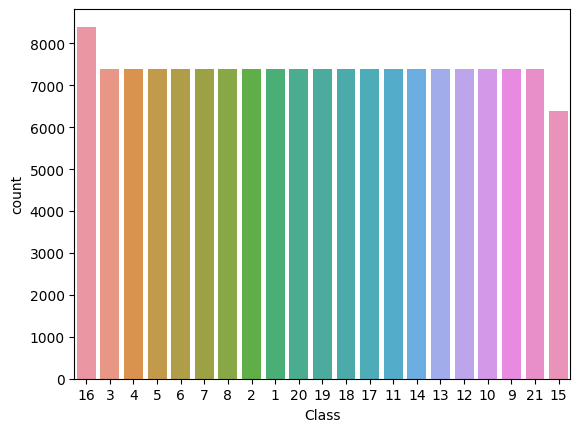

In [ ]:
sns.countplot(x = 'Class',
              data = data,
              order = data.Class.value_counts().index);

# **OUTLIER**

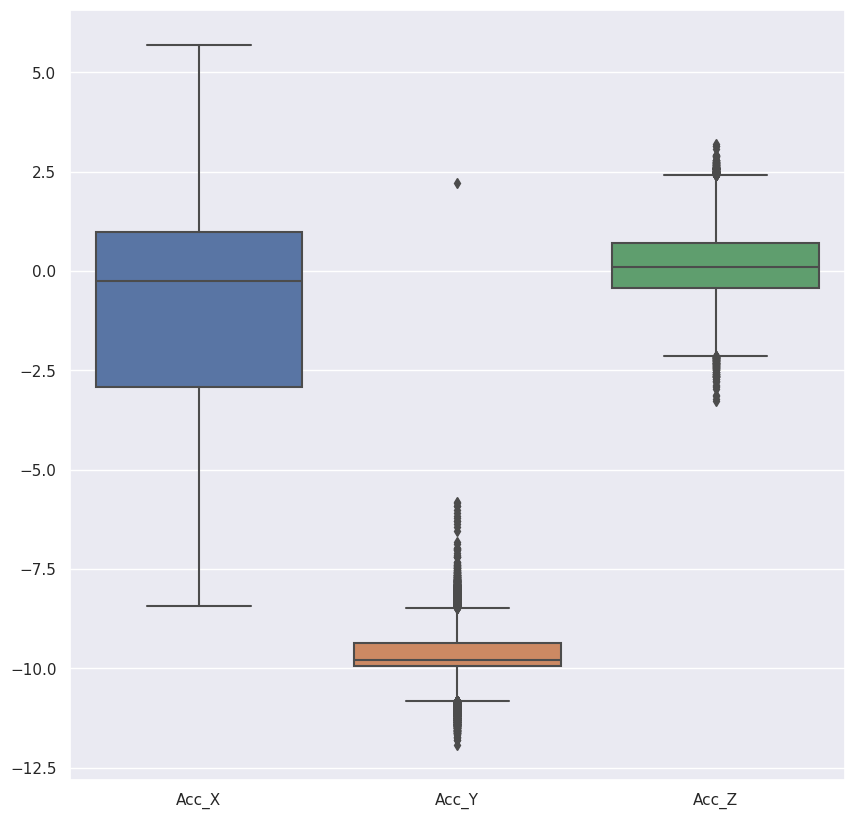

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
fig= sns.boxplot(data=data.iloc[0:30000,0:3])
figure=fig.get_figure()

In [ ]:
f=0
g=0
p=0

#finding first and last index of every class
ind=data.index.to_series().groupby(data['Class']).agg(['first','last']).reset_index()
print(ind)

    Class   first    last
0       1       0    7399
1       2    7400   14800
2       3   14801   22201
3       4   22202   29602
4       5   29603   37003
5       6   37004   44404
6       7   44405   51805
7       8   51806   59206
8       9   59207   66606
9      10   66607   74006
10     11   74007   81406
11     12   81407   88806
12     13   88807   96206
13     14   96207  103606
14     15  103607  110006
15     16  110007  118406
16     17  118407  125806
17     18  125807  133206
18     19  133207  140606
19     20  140607  148006
20     21  148007  155406


In [ ]:
for m in range(1,22):
    A = data.loc[data['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        Avg= np.mean(A.iloc[:,i])
        #Avg
        Q1 = A.iloc[:,i].quantile(0.25)
        #Q1
        Q3 = A.iloc[:,i].quantile(0.75)
        #Q3
        IQR = Q3 - Q1
        #IQR
        lim1=(Q1 - 1.5 * IQR)
        #lim1
        lim2=(Q3 + 1.5 * IQR)
        #lim2       
        for ami in range(first,last+1):
            com=data.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                data.iloc[ami,i] = Avg
                f=f+1
        print(f)
    if(p<21):
        p=p+1

(7400, 4)
0
7399
0
83
(7401, 4)
7400
14800
83
118
(7401, 4)
14801
22201
118
320
(7401, 4)
22202
29602
576
1528
(7401, 4)
29603
37003
1528
1528
(7401, 4)
37004
44404
1528
1528
(7401, 4)
44405
51805
1528
1528
(7401, 4)
51806
59206
2357
2380
(7400, 4)
59207
66606
2689
2753
(7400, 4)
66607
74006
2871
2871
(7400, 4)
74007
81406
2871
3180
(7400, 4)
81407
88806
3313
3458
(7400, 4)
88807
96206
3897
3897
(7400, 4)
96207
103606
3897
3946
(6400, 4)
103607
110006
5431
5431
(8400, 4)
110007
118406
5431
5431
(7400, 4)
118407
125806
6579
6579
(7400, 4)
125807
133206
6585
6585
(7400, 4)
133207
140606
6585
6585
(7400, 4)
140607
148006
6714
6792
(7400, 4)
148007
155406
6792
6792


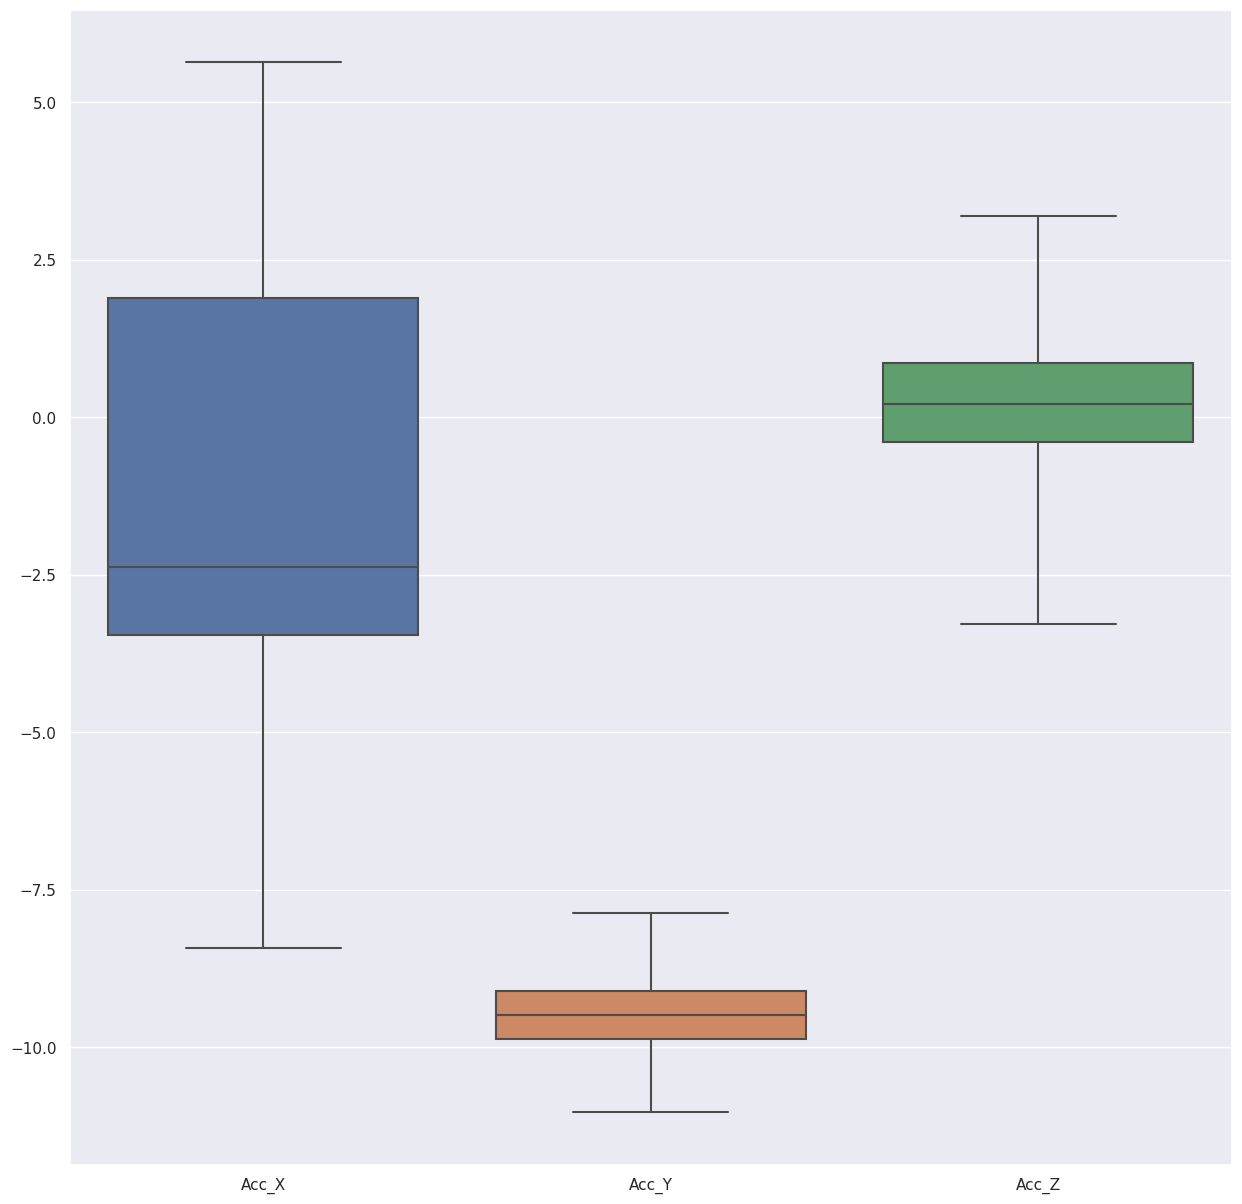

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()

In [ ]:
data.to_csv('withoutoutlier.csv')

In [ ]:
balanced_data = pd.read_csv('withoutoutlier.csv')
balanced_data

Unnamed: 0     Acc_X     Acc_Y     Acc_Z  Class
0                0  2.660984 -9.653030  0.470237      1
1                1  2.223091 -9.432167  2.223091      1
2                2  2.098372 -9.481953  0.926070      1
3                3  2.716461 -9.739352  0.912008      1
4                4  2.288388 -9.371498  0.910390      1
...            ...       ...       ...       ...    ...
155402      155402  8.701128  4.238336 -0.194529     21
155403      155403  8.680778  4.261679 -0.159214     21
155404      155404  8.756194  4.168306 -0.144251     21
155405      155405  8.662222  4.219781 -0.183755     21
155406      155406  8.738238  4.180277 -0.201711     21

[155407 rows x 5 columns]

In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Class'])
balanced_data

Unnamed: 0     Acc_X     Acc_Y     Acc_Z  Class  label
0                0  2.660984 -9.653030  0.470237      1      0
1                1  2.223091 -9.432167  2.223091      1      0
2                2  2.098372 -9.481953  0.926070      1      0
3                3  2.716461 -9.739352  0.912008      1      0
4                4  2.288388 -9.371498  0.910390      1      0
...            ...       ...       ...       ...    ...    ...
155402      155402  8.701128  4.238336 -0.194529     21     20
155403      155403  8.680778  4.261679 -0.159214     21     20
155404      155404  8.756194  4.168306 -0.144251     21     20
155405      155405  8.662222  4.219781 -0.183755     21     20
155406      155406  8.738238  4.180277 -0.201711     21     20

[155407 rows x 6 columns]

In [ ]:
dfn = balanced_data.drop('Unnamed: 0', axis=1)  
dfn

Acc_X     Acc_Y     Acc_Z  Class  label
0       2.660984 -9.653030  0.470237      1      0
1       2.223091 -9.432167  2.223091      1      0
2       2.098372 -9.481953  0.926070      1      0
3       2.716461 -9.739352  0.912008      1      0
4       2.288388 -9.371498  0.910390      1      0
...          ...       ...       ...    ...    ...
155402  8.701128  4.238336 -0.194529     21     20
155403  8.680778  4.261679 -0.159214     21     20
155404  8.756194  4.168306 -0.144251     21     20
155405  8.662222  4.219781 -0.183755     21     20
155406  8.738238  4.180277 -0.201711     21     20

[155407 rows x 5 columns]

In [ ]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [ ]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

Acc_X     Acc_Y     Acc_Z       mag  label
0  0.985481 -0.807007 -0.491449  1.365267      0
1  0.865844 -0.763546 -0.059973  1.155978      0
2  0.831769 -0.773343 -0.379243  1.197382      0
3  1.000638 -0.823993 -0.382704  1.351556      0
4  0.883684 -0.751608 -0.383103  1.221712      0

In [ ]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)

scaled_X

mag  label
0       1.365267      0
1       1.155978      0
2       1.197382      0
3       1.351556      0
4       1.221712      0
...          ...    ...
155402  3.329777     20
155403  3.326341     20
155404  3.331364     20
155405  3.318731     20
155406  3.331576     20

[155407 rows x 2 columns]

In [ ]:
import scipy.stats as stats


In [ ]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 1
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

<ipython-input-23-d5294cde681b>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [ ]:
frames

[[array([1.36526721, 1.15597789, 1.1973823 , 1.35155561, 1.22171154,
         1.39998588, 1.24071948, 1.44282169, 1.18424158, 1.47995624,
         1.33718999, 1.40314429, 1.35352911, 1.39702549, 1.16965787,
         1.49829438, 1.25160314, 1.44631265, 1.26914888, 1.46394115,
         1.20315026, 1.49816562, 1.35350222, 1.30552018, 1.38081524,
         1.2409114 , 1.49620597, 1.22962723, 1.38606102, 1.28693125,
         1.50836541, 1.20397838, 1.41279747, 1.27277002, 1.43521593,
         1.20089205, 1.48315232, 1.21451801, 1.49481517, 1.16056979,
         1.49539754, 1.17207398, 1.52684904, 1.11141564, 1.52182865,
         1.1919541 , 1.44713669, 1.09060842, 1.51547038, 1.26043368,
         1.42098619, 1.41965769, 1.28338006, 1.37563355, 1.25026159,
         1.4652691 , 1.17792881, 1.48747907, 1.09995597, 1.4949436 ,
         1.16584162, 1.48534913, 1.16718812, 1.49364594, 1.03913124,
         1.51235424, 1.1549825 , 1.4917784 , 1.21352015, 1.4716492 ,
         1.29954556, 1.42716638, 1

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(frames)


7751

In [ ]:
len(labels)

7751

In [ ]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [ ]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels.shape)



RESHAPE SHAPE:  (7751, 400)
LABELS:  (7751,)


In [ ]:
print("Frames: ",frames[0])

Frames:  [1.36526721 1.15597789 1.1973823  1.35155561 1.22171154 1.39998588
 1.24071948 1.44282169 1.18424158 1.47995624 1.33718999 1.40314429
 1.35352911 1.39702549 1.16965787 1.49829438 1.25160314 1.44631265
 1.26914888 1.46394115 1.20315026 1.49816562 1.35350222 1.30552018
 1.38081524 1.2409114  1.49620597 1.22962723 1.38606102 1.28693125
 1.50836541 1.20397838 1.41279747 1.27277002 1.43521593 1.20089205
 1.48315232 1.21451801 1.49481517 1.16056979 1.49539754 1.17207398
 1.52684904 1.11141564 1.52182865 1.1919541  1.44713669 1.09060842
 1.51547038 1.26043368 1.42098619 1.41965769 1.28338006 1.37563355
 1.25026159 1.4652691  1.17792881 1.48747907 1.09995597 1.4949436
 1.16584162 1.48534913 1.16718812 1.49364594 1.03913124 1.51235424
 1.1549825  1.4917784  1.21352015 1.4716492  1.29954556 1.42716638
 1.20770755 1.48209334 1.21552625 1.36544924 1.40884354 1.1959328
 1.48346148 1.09830952 1.47398042 1.18877934 1.4377951  1.14638089
 1.46774438 1.20487231 1.34034739 1.35225566 1.33328716

In [ ]:
print("LABELS: ",labels[0])


LABELS:  0


In [ ]:
x=frames
y=labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [ ]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [ ]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [ ]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [ ]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 64)


In [ ]:
import torch.nn as nn
from torch.nn import functional as f



class SignalSegmentDefinition(nn.Module):

    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):

    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):

    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
  
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x



class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [ ]:
class Attention(nn.Module):

    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):

    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out

In [ ]:
import torch.nn.functional as F


In [ ]:
class GRAPHSENSOR(nn.Module):

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=21).to(device)

In [ ]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [ ]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [ ]:
best_acc = 0
best_f1 = 0

In [ ]:
import os
import argparse
import time
import random
import torch.optim as optim

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:
start_time = time.time()

In [ ]:
def adjust_learning_rate(optimizer, epoch, args):
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001

In [ ]:
class AverageMeter(object):
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [ ]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')

In [ ]:
accuracies = []
f1_scores = []


    

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))

In [ ]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()



            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))
        
        accuracies.append(accuracy.avg)
        f1_scores.append(f1_score.avg)
        
        return accuracy.avg, f1_score.avg

In [ ]:
epochs=200

In [ ]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=40)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
    
    if is_best:
            print('Saving..')
            best_f1 = f1
            state = {
                'model': model.state_dict(),
                'best_acc1': best_acc,
                'best_acc5': best_f1,
                'epoch': epoch,
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            filename = "best_model"
            torch.save(state, './checkpoint/' + filename + '_ckpt.t7')
                    
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  


Start of epoch NO: 0
Epoch: [0][0/96]	Loss 3.0815 (3.0815)	accuracy 4.688 (4.688)	f1_score 2.979 (2.979)
Epoch: [0][40/96]	Loss 1.6594 (2.1482)	accuracy 31.250 (25.838)	f1_score 30.194 (18.798)
Epoch: [0][80/96]	Loss 1.5987 (1.9390)	accuracy 51.562 (31.250)	f1_score 40.663 (24.210)
 Test: accuracy 35.938 f1_score 26.968
Saving..
Training time:  13.217268466949463 Hour:  0 Minute:  0 Second:  13 Test best accuracy: 35.9375  Test best f1 score: 26.96753517455308

Start of epoch NO: 1
Epoch: [1][0/96]	Loss 1.4673 (1.4673)	accuracy 45.312 (45.312)	f1_score 36.283 (36.283)
Epoch: [1][40/96]	Loss 1.4713 (1.5456)	accuracy 46.875 (39.634)	f1_score 37.279 (32.712)
Epoch: [1][80/96]	Loss 1.3549 (1.4893)	accuracy 51.562 (42.168)	f1_score 43.091 (35.067)
 Test: accuracy 42.057 f1_score 35.092
Saving..
Training time:  20.775578260421753 Hour:  0 Minute:  0 Second:  20 Test best accuracy: 42.057291666666664  Test best f1 score: 35.09203793656944

Start of epoch NO: 2
Epoch: [2][0/96]	Loss 1.4914 (1

In [ ]:
accuracies

[35.9375,
 42.057291666666664,
 47.4609375,
 59.244791666666664,
 51.432291666666664,
 33.072916666666664,
 46.809895833333336,
 59.5703125,
 57.2265625,
 52.669270833333336,
 69.140625,
 49.479166666666664,
 65.0390625,
 41.6015625,
 62.369791666666664,
 76.953125,
 69.27083333333333,
 58.658854166666664,
 60.3515625,
 61.1328125,
 58.528645833333336,
 58.723958333333336,
 69.79166666666667,
 52.799479166666664,
 60.416666666666664,
 77.9296875,
 60.286458333333336,
 39.453125,
 75.84635416666667,
 78.05989583333333,
 50.065104166666664,
 64.84375,
 68.81510416666667,
 66.92708333333333,
 59.700520833333336,
 73.046875,
 71.875,
 80.46875,
 76.43229166666667,
 66.92708333333333,
 72.33072916666667,
 79.1015625,
 73.89322916666667,
 87.109375,
 74.0234375,
 52.799479166666664,
 89.0625,
 87.23958333333333,
 54.1015625,
 77.47395833333333,
 67.31770833333333,
 77.86458333333333,
 82.74739583333333,
 69.40104166666667,
 61.848958333333336,
 75.91145833333333,
 64.6484375,
 77.34375,
 76.

In [ ]:
len(accuracies) , len(f1_scores)

(200, 200)

In [ ]:
f1_scores

[26.96753517455308,
 35.09203793656944,
 40.17181597962594,
 52.997831061192585,
 44.76155290511493,
 26.530480296747985,
 38.76402638024293,
 53.35424260422417,
 50.72985926673454,
 46.26256147412207,
 64.02303654238179,
 42.71652400148502,
 58.614485711847685,
 37.015026718265496,
 57.23498283064708,
 72.99255896988971,
 65.28883506417877,
 53.29163946476299,
 56.21304101719776,
 53.44626529642378,
 52.503974363024554,
 53.2087607432864,
 64.0711980754965,
 46.93671869801303,
 53.291126557511745,
 74.45730692135767,
 54.19844015183467,
 32.773548471701105,
 71.28442795914252,
 72.94150916323535,
 44.73242745865709,
 60.723513547992034,
 61.51471575472292,
 61.62939118006012,
 53.84869276794404,
 68.1202305856911,
 66.09623476157456,
 76.4857911323685,
 72.66462791853475,
 62.493040574236225,
 67.45822627262439,
 75.6899948047486,
 68.16388751771787,
 83.71613378444796,
 70.53273604102444,
 46.015119305468346,
 86.39018728938841,
 84.9278938003622,
 45.49856515811385,
 74.186647939379

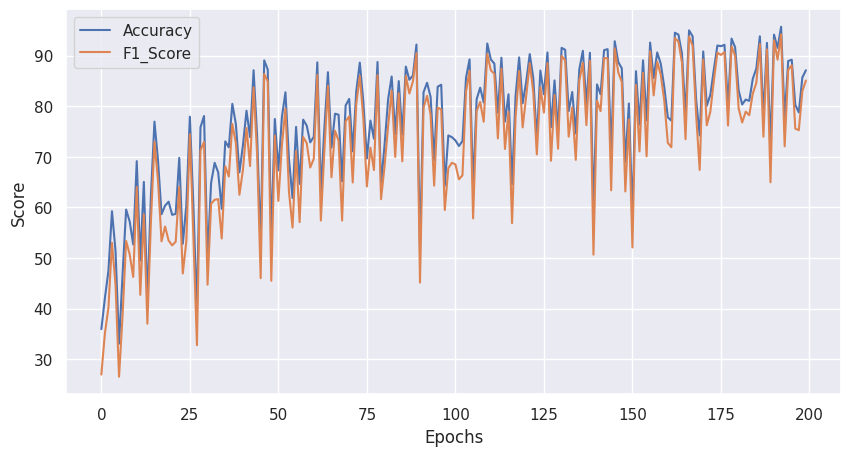

In [ ]:
plt.figure(figsize=(10,5)) 
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(accuracies, label = "Accuracy")
plt.plot(f1_scores, label = "F1_Score")
plt.legend()
plt.savefig('plot.png')


In [ ]:
avg_accuracy = sum(accuracies)/len(accuracies)
avg_f1_score = sum(f1_scores)/len(f1_scores)

print('Avg_Accuracy =',float("{:.2f}".format(avg_accuracy)))
print('Avg_F1_score =',float("{:.2f}".format(avg_f1_score)))


Avg_Accuracy = 76.93
Avg_F1_score = 72.83
